In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data pre-processing

In [2]:
data_train_full = pd.read_csv('data_train_full.csv')
test_extrapolation = pd.read_csv('test_extrapolation.csv')
test_interpolation = pd.read_csv('test_interpolation.csv')

In [3]:
data = pd.concat([data_train_full, test_extrapolation, test_interpolation], ignore_index=True).reset_index(drop=True).sort_values(['ID', 'times'], ignore_index=True)
data

,ID,site,age,gender,ethnicity,height,weight,smoker,kidney_transplant,patient_died,disease,bp.sys,bun,egfr,times
0,0,Sheffield,59.0,Male,Unknown,1.69,132.2,Unknown,False,False,GMN,150.600000,8.0,73.0,0
1,0,Sheffield,59.0,Male,Unknown,1.69,132.2,Unknown,False,False,GMN,143.000000,8.0,62.0,168
2,0,Sheffield,59.0,Male,Unknown,1.69,132.2,Unknown,False,False,GMN,150.000000,6.0,74.0,294
3,0,Sheffield,60.0,Male,Unknown,1.69,132.2,Unknown,False,False,GMN,138.000000,7.0,77.0,492
4,0,Sheffield,60.0,Male,Unknown,1.69,132.2,Unknown,False,False,GMN,144.000000,7.0,70.0,608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10393,1366,Patras,37.0,Male,Caucasian,1.78,68.0,Non-Smoker,True,False,Transplant,120.000000,63.0,61.0,359
10394,1366,Patras,37.0,Male,Caucasian,1.78,68.0,Non-Smoker,True,False,Transplant,118.333333,39.0,66.0,473
10395,1366,Patras,37.0,Male,Caucasian,1.78,68.0,Non-Smoker,True,False,Transplant,120.000000,45.0,61.0,535
10396,1366,Patras,38.0,Male,Caucasian,1.78,68.0,Non-Smoker,True,False,Transplant,115.000000,48.0,66.0,597


In [6]:
data.groupby(['site']).size()

site
Patras       4277
Sheffield    6121
dtype: int64

# Plots

In [ ]:
data.describe()

,ID,age,height,weight,bp.sys,bun,egfr,times
count,10398.000000,10398.000000,10398.000000,10398.000000,10398.000000,10398.000000,10398.000000,10398.000000
mean,690.229275,55.820542,1.684852,80.095809,139.608855,38.445200,46.558127,647.066936
std,394.913036,14.108195,0.081396,14.808286,17.082041,36.939035,25.030598,603.120534
min,0.000000,16.000000,1.410000,38.600000,72.000000,1.000000,4.000000,0.000000
25%,344.000000,47.000000,1.600000,71.666667,130.000000,11.000000,27.000000,170.000000
50%,703.000000,56.000000,1.690000,80.200000,139.710063,24.000000,42.000000,506.000000
75%,1027.750000,66.000000,1.730000,85.525000,150.000000,55.000000,61.000000,962.000000
max,1366.000000,92.000000,2.020000,159.100000,237.000000,291.000000,189.000000,4988.000000


In [ ]:
data[data['site']=='Patras']['ID'].unique().size

492

In [ ]:
data[data['site']=='Sheffield']['ID'].unique().size

875

In [ ]:
# Patras patients have higher mean eGFR
data.groupby(['site']).egfr.mean()

site
Patras       56.192284
Sheffield    39.826336
Name: egfr, dtype: float64

In [ ]:
sns.set(style="ticks", font_scale=1.25)

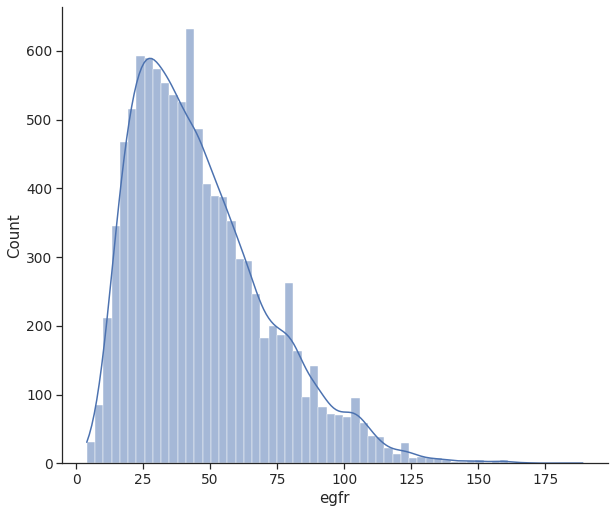

In [ ]:
ax = sns.displot(data=data, x='egfr', kde=True)
ax.fig.set_size_inches(10, 8)

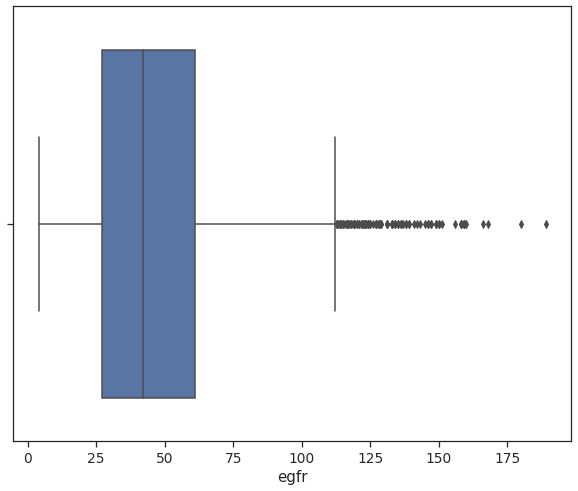

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=data, x='egfr')

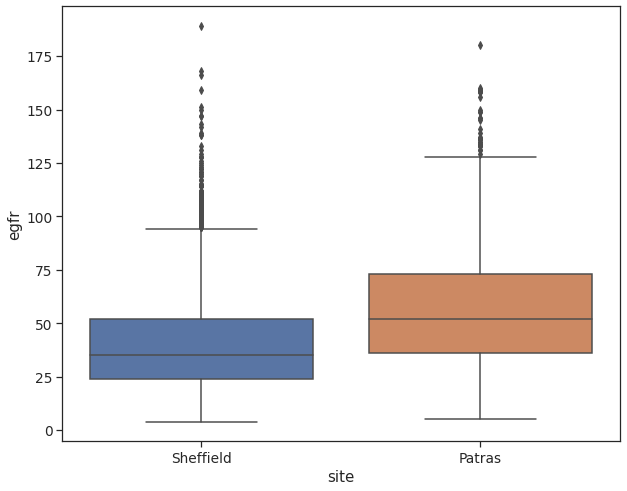

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='site', y='egfr', data=data)

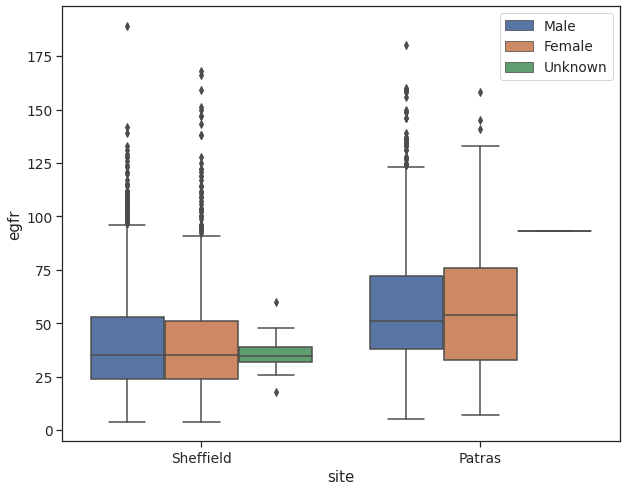

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='site', y='egfr', hue='gender', data=data)
plt.legend(loc='upper right')

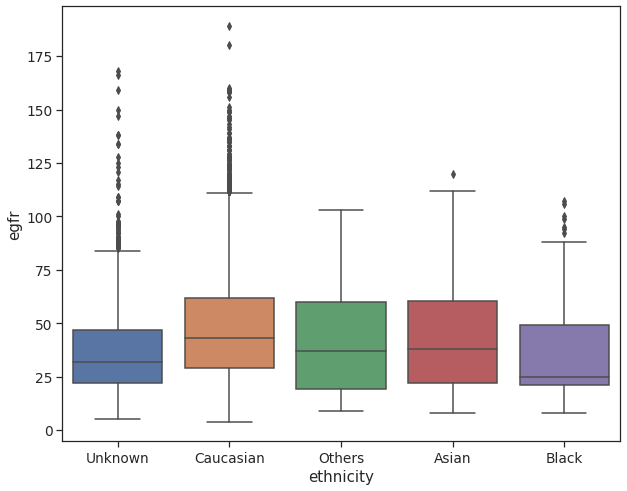

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='ethnicity', y='egfr', data=data)

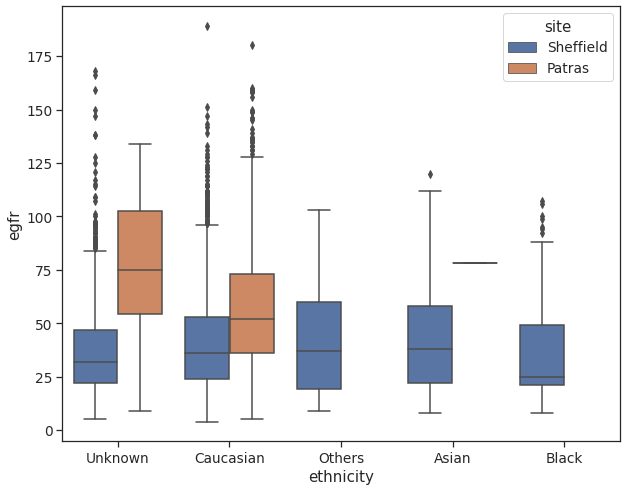

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='ethnicity', y='egfr', hue='site', data=data)

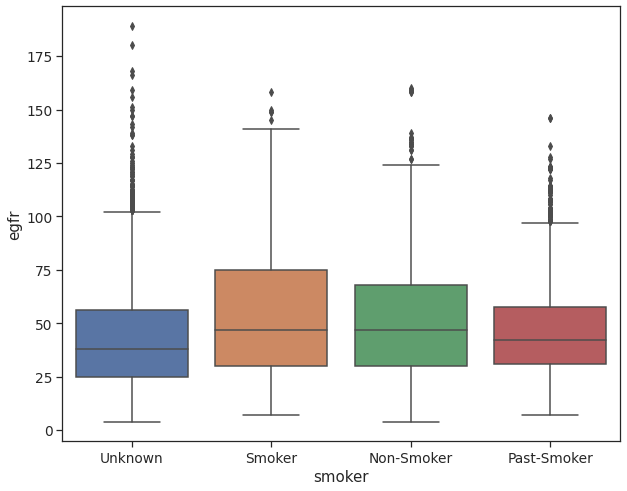

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='smoker', y='egfr', data=data)

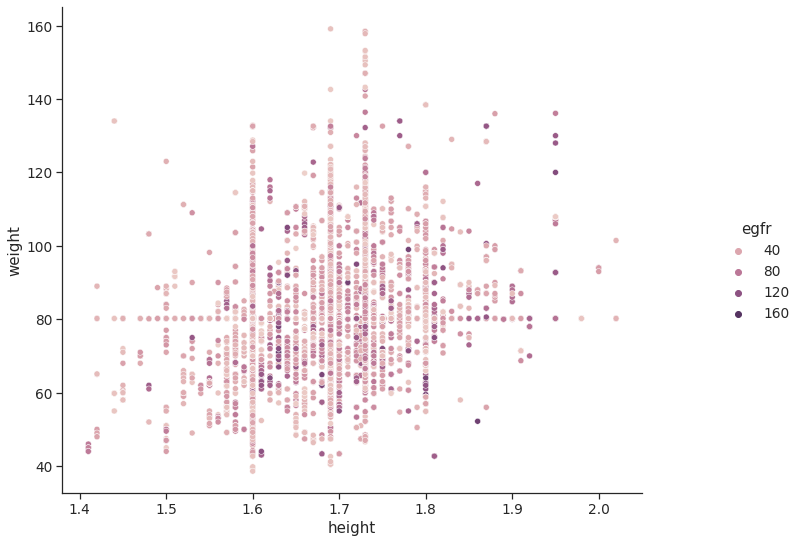

In [ ]:
ax = sns.relplot(x='height', y='weight', hue='egfr', data=data)
ax.fig.set_size_inches(12, 8)

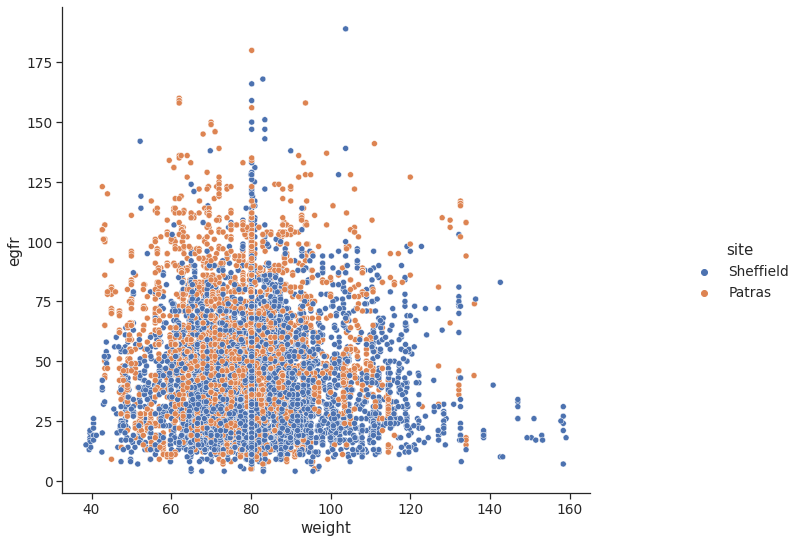

In [ ]:
ax = sns.relplot(x='weight', y='egfr', hue='site', data=data)
ax.fig.set_size_inches(12, 8)

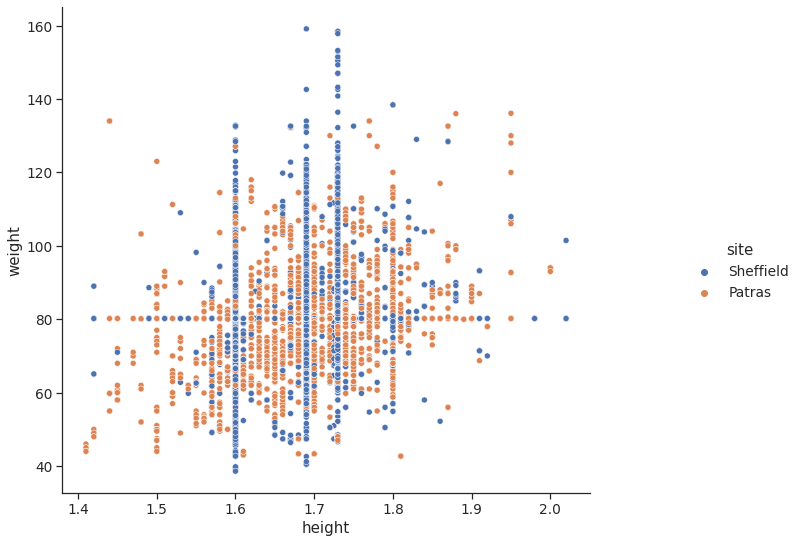

In [ ]:
ax = sns.relplot(x='height', y='weight', hue='site', data=data)
ax.fig.set_size_inches(12, 8)

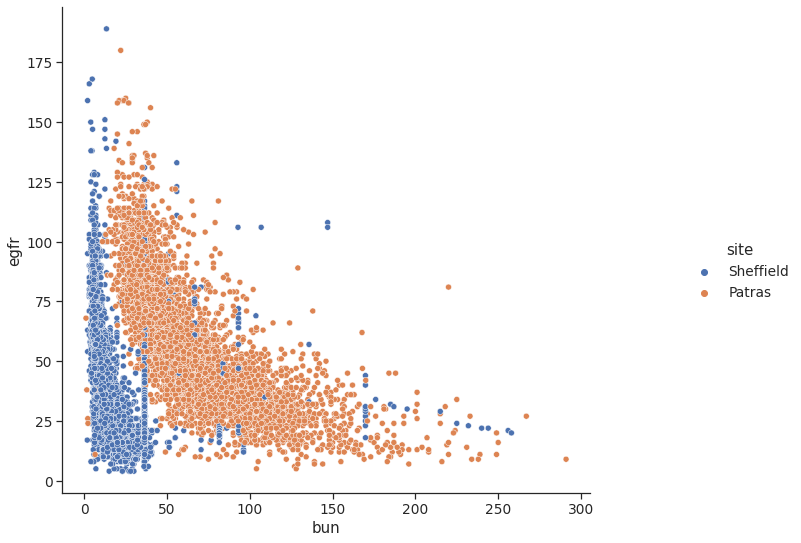

In [ ]:
ax = sns.relplot(x='bun', y='egfr', hue='site', data=data)
ax.fig.set_size_inches(12, 8)

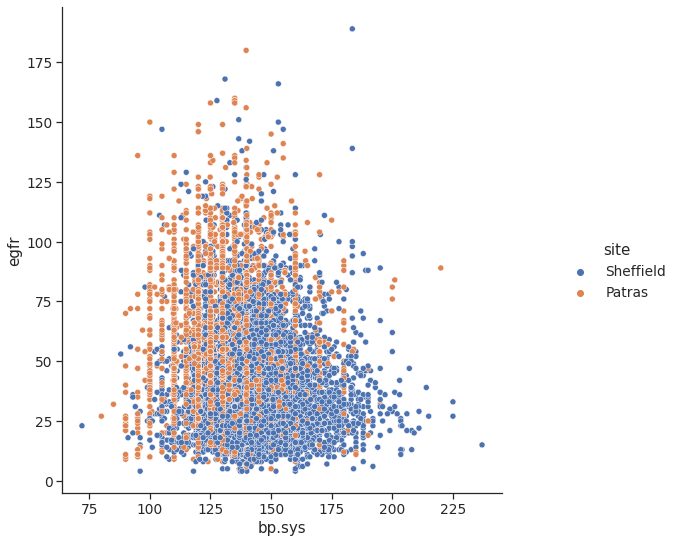

In [ ]:
ax = sns.relplot(x='bp.sys', y='egfr', hue='site', data=data)
ax.fig.set_size_inches(10, 8)

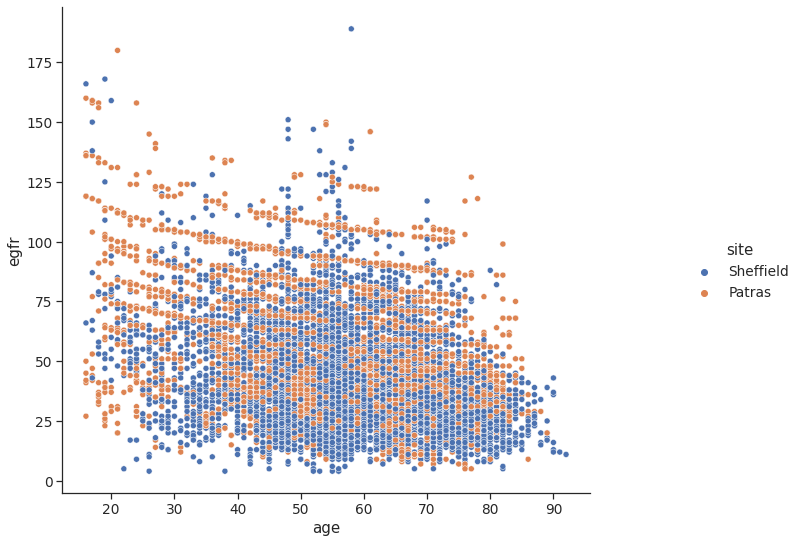

In [ ]:
ax = sns.relplot(x='age', y='egfr', hue='site', data=data)
ax.fig.set_size_inches(12, 8)

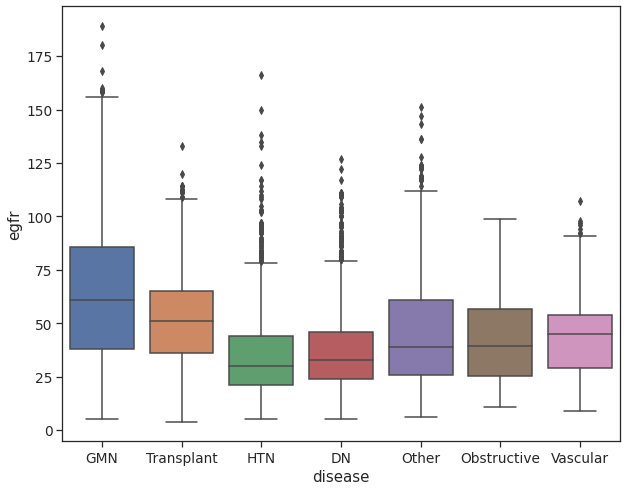

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='disease', y='egfr', data=data)

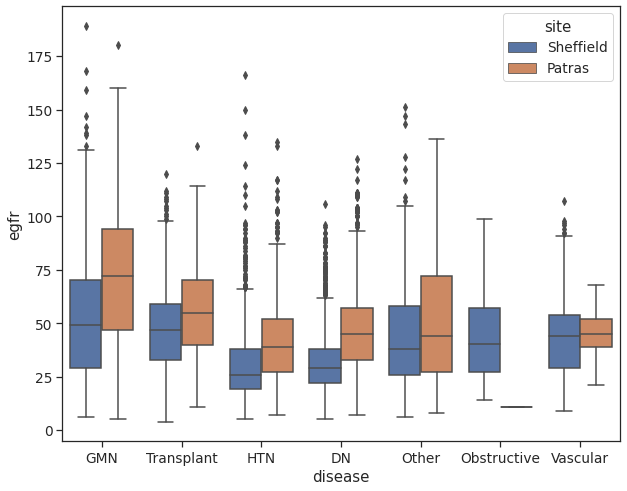

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='disease', y='egfr', hue='site', data=data)

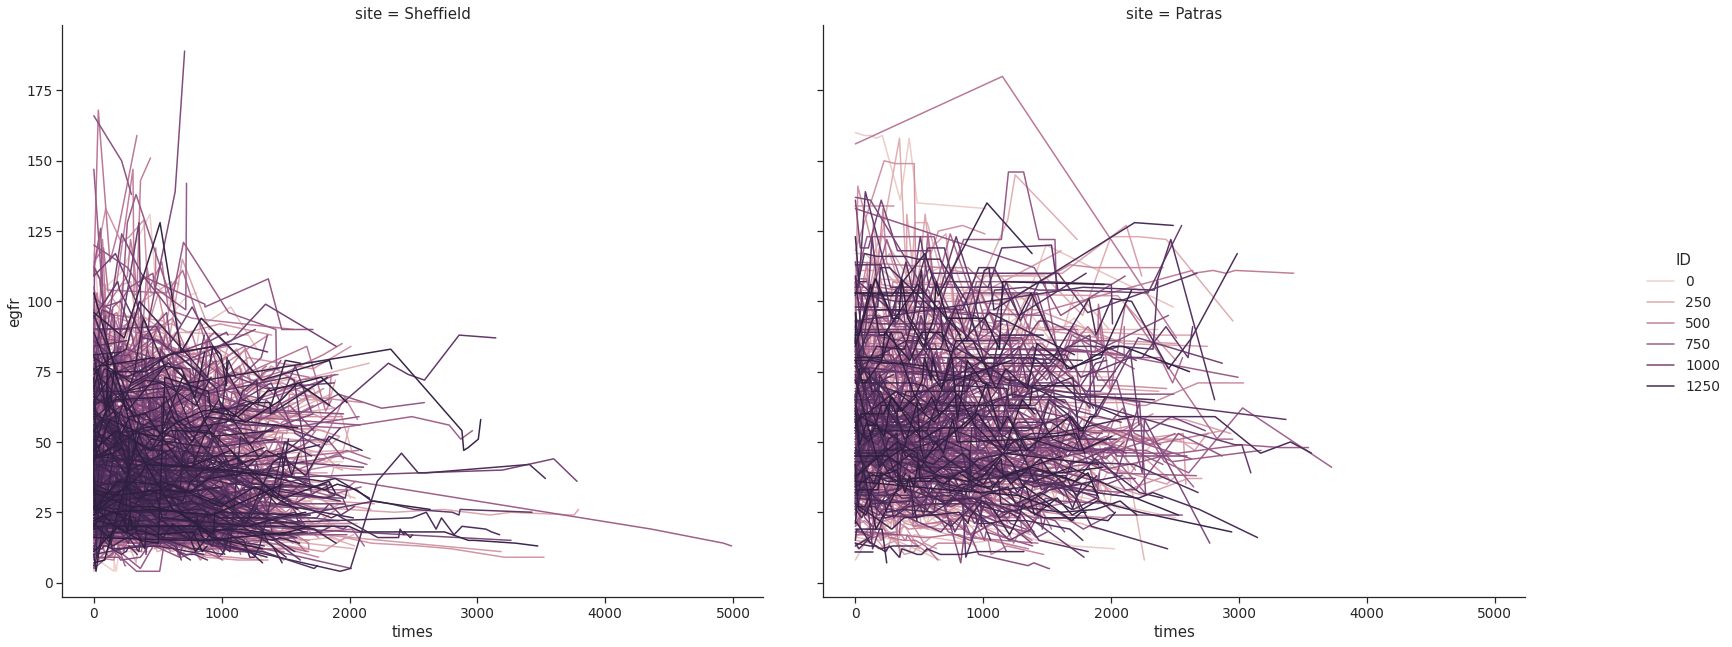

In [ ]:
ax = sns.relplot(x='times', y='egfr', hue='ID', col='site', data=data, kind='line')
ax.fig.set_size_inches(25, 10)